uint8
(1175, 850, 4)


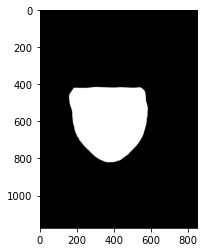

In [1]:
import imageio as iio
import numpy as np
from matplotlib import pyplot as plt
 
img = iio.imread('Mask.png') #reading image
print(img.dtype) #image type
print(img.shape)
plt.imshow(img,cmap='gray');

Lossy conversion from int64 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


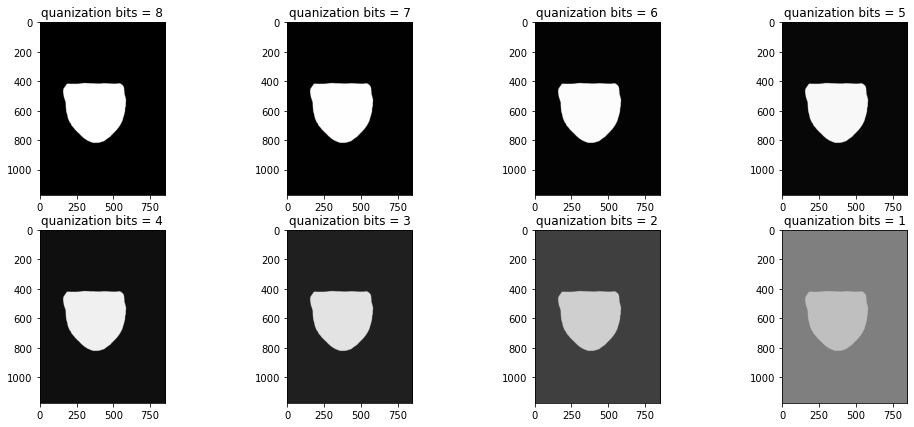

In [11]:
bits = [0,1,2,3,4,5,6,7]
plt.figure(figsize = (17, 7))
temp = img
for i in range(len(bits)):
    plt.subplot(2,4,i+1)
    temp = (temp/2**bits[i]).astype(int)*(2**bits[i])
    plt.imshow(temp,cmap='gray')
    plt.title("quanization bits = " + str(8-bits[i]))
temp = 
iio.imwrite('Mask2.png',255*((temp/np.max(temp)).astype(bool)))

In [5]:
bits = [0,1,2,3,4,5,6,7]
temp = img
N = 5
m, n = img.shape
images = []
for i in range(len(bits)):
    for j in range(N):
        mask = np.random.randint(2, size=(m,n))
        quant = mask*img #pixels to quantize
        others = img - quant #no retouch
        quant = (quant/2**bits[i]).astype(int)*(2**bits[i])
        temp = quant + others
        images.append(temp.astype(np.uint8))
iio.mimsave('quantized_campusdrive.gif', images, duration=0.01);